Question 3

In [174]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.linalg as la

A = np.mat('0.7 -0.1; 0.2 1')
B = np.mat('0.1; 0')
C = np.mat('1 0')
Q = np.mat('0.0025 0; 0 0') # the covariance of process noise
R = np.mat('1') # the covariance of measurement noise

N = 200 # 200 steps in total
nx = 2
ny = 1
x = np.mat(np.zeros((nx,N)))
w = np.mat(np.zeros((nx,N)))
u = np.mat(np.zeros((ny,N)))
v = np.mat(np.zeros((ny,N)))
y = np.mat(np.zeros((ny,N)))

for k in range(N-1):
    v[:,k] = la.sqrtm(R)@np.random.randn(1,1); #  measurement noise (zero mean Gaussian with covariance R)
    w[:,k] = la.sqrtm(Q)@np.random.randn(2,1);  # process noise (zero mean Gaussian with covariance Q)
    u[:,k] = np.cos(4*np.pi*k/200)
    y[:,k] = C@x[:,k] + v[:,k];  # take measurement at time k
    x[:,k+1] = A@x[:,k] + B@u[:,k] + w[:,k]; 

time = np.arange(N)

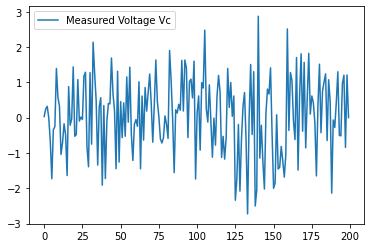

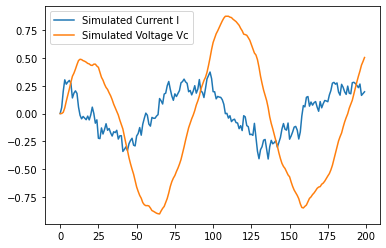

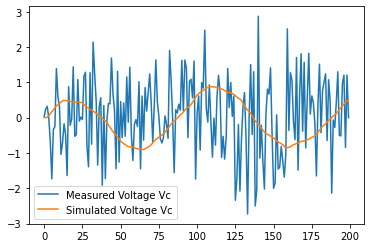

In [175]:
# plt.subplot(211)
plt.plot(time,y.T)
plt.legend(['Measured Voltage Vc'])

plt.figure()
plt.plot(time,x.T)
plt.legend(['Simulated Current I', 'Simulated Voltage Vc'])

plt.figure()
plt.plot(time,y.T)
plt.plot(time,x[1,:].T)
plt.legend(['Measured Voltage Vc', 'Simulated Voltage Vc'])

Question 4 Implement of the Kalman Filter

In [176]:
xhat = np.mat(np.zeros((nx,N)))
xPred = np.mat(np.zeros((nx,N)))
K = np.zeros((nx,ny,N))
P = np.zeros((nx,nx,N))
Ppred = np.zeros((nx,nx,N))
P[:,:,0] = 0.1 * np.eye(2) # initial P
xhat[:,0]= np.zeros((2,1)); # initial x

for k in np.arange(1,N):
    #prediction step, first compute predicted state at k
    xPred[:,k] = A@xhat[:,k-1] + B@u[:,k]
    #then update covariance matrix 
    Ppred[:,:,k] = A@P[:,:,k-1]@A.T + Q
    #measurement update step
    # first compute Kalman gain
    K[:,:,k] = Ppred[:,:,k]@C.T@la.inv(C@Ppred[:,:,k]@C.T + R)
    # then do the update
    xhat[:,k]= xPred[:,k]  + K[:,:,k]@(y[:,k]-C@xPred[:,k])
    P[:,:,k] = (np.eye(2) - K[:,:,k]@C)@Ppred[:,:,k]


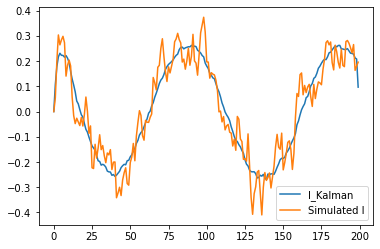

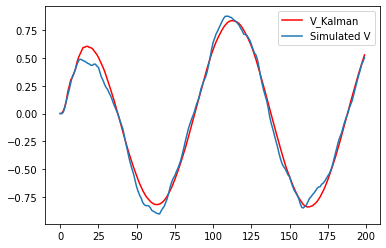

In [177]:
time = np.arange(N)
plt.plot(time, xhat[0,:].T)
plt.plot(time, x[0,:].T)
plt.legend(['I_Kalman', 'Simulated I'])

plt.figure()
plt.plot(time, xhat[1,:].T,'r') 
plt.plot(time, x[1,:].T)
plt.legend(['V_Kalman', 'Simulated V'])


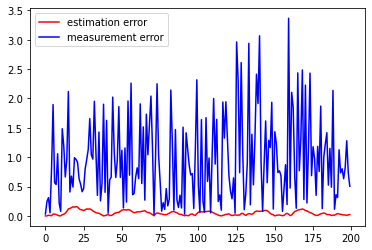

In [178]:
estimation_error = np.mat(np.zeros((1,N)))
measurement_error = np.mat(np.zeros((1,N)))
for k in range(N):
    estimation_error[0,k] = np.abs(xhat[1,k]-x[1,k]) # use the absolute value
    measurement_error[0,k] = np.abs(y[0,k]-x[1,k])

plt.plot(time, estimation_error.T, 'r') # plot the estimation error
plt.plot(time, measurement_error.T, 'b') # plot the measurement error vk
plt.legend(['estimation error', 'measurement error'])

In [179]:
print(P[:,:,99])

[[ 0.00516569 -0.0005159 ]
 [-0.0005159   0.00890963]]


Question 5 Modified Kalman Filter

Sigma = 0.001, 0.01, 0.02, 0.1 

In [180]:
for i in np.arange(0,4):
    sigma = np.array((0.001, 0.01, 0.02, 0.1))
    xhat = np.mat(np.zeros((nx,N)))
    Pred = np.mat(np.zeros((nx,N)))
    Cov = sigma[i] * np.eye(2)
    K = np.zeros((nx,ny,N))
    P = np.zeros((nx,nx,N))
    z = np.mat(np.zeros((nx,N)))
    Ppred = np.zeros((nx,nx,N))
    P[:,:,0] = 0.1 * np.eye(2) # initial P
    xhat[:,0]= np.zeros((2,1)); # initial x

    for k in range(N-1):
        z[:,k] = la.sqrtm(Cov)@np.random.randn(2,1); 
        
    for k in np.arange(1,N):
        #prediction step, first compute predicted state at k 
        xPred[:,k] = A@xhat[:,k-1] + z[:,k]
        #then update covariance matrix 
        Ppred[:,:,k] = A@P[:,:,k-1]@A.T + Q
        #measurement update step
        # first compute Kalman gain
        K[:,:,k] = Ppred[:,:,k]@C.T@la.inv(C@Ppred[:,:,k]@C.T + R)
        # then do the update
        xhat[:,k]= xPred[:,k]  + K[:,:,k]@(y[:,k]-C@xPred[:,k])
        P[:,:,k] = (np.eye(2) - K[:,:,k]@C)@Ppred[:,:,k]
        
    if(i == 0):
        x_estimate1 = np.mat(np.zeros((nx,N)))
        x_estimate1 = xhat
    if(i == 1):
        x_estimate2 = np.mat(np.zeros((nx,N)))
        x_estimate2 = xhat
    if(i == 2):
        x_estimate3 = np.mat(np.zeros((nx,N)))
        x_estimate3 = xhat
    if(i == 3):
        x_estimate4 = np.mat(np.zeros((nx,N)))
        x_estimate4 = xhat   
time = np.arange(N)

sigma = 0.001


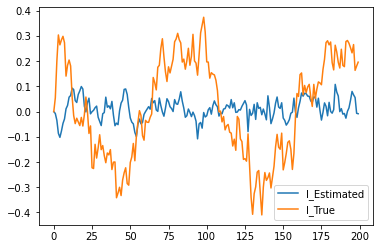

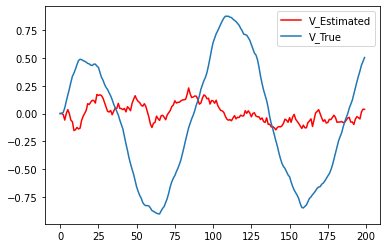

In [181]:
plt.plot(time, x_estimate1[0,:].T)
plt.plot(time, x[0,:].T)
plt.legend(['I_Estimated', 'I_True'])

plt.figure()
plt.plot(time, x_estimate1[1,:].T,'r') 
plt.plot(time, x[1,:].T)
plt.legend(['V_Estimated', 'V_True'])

sigma = 0.01

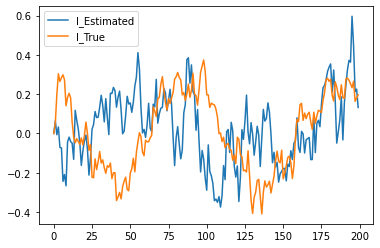

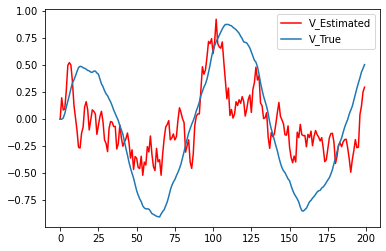

In [182]:
plt.plot(time, x_estimate2[0,:].T)
plt.plot(time, x[0,:].T)
plt.legend(['I_Estimated', 'I_True'])

plt.figure()
plt.plot(time, x_estimate2[1,:].T,'r') 
plt.plot(time, x[1,:].T)
plt.legend(['V_Estimated', 'V_True'])

sigma = 0.02

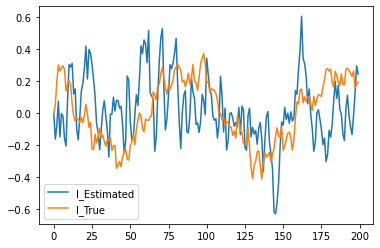

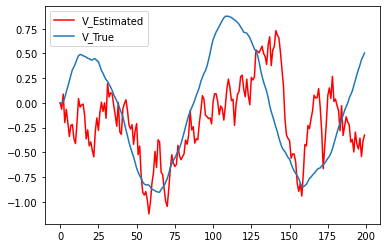

In [183]:
plt.plot(time, x_estimate3[0,:].T)
plt.plot(time, x[0,:].T)
plt.legend(['I_Estimated', 'I_True'])

plt.figure()
plt.plot(time, x_estimate3[1,:].T,'r') 
plt.plot(time, x[1,:].T)
plt.legend(['V_Estimated', 'V_True'])

sigma = 0.1

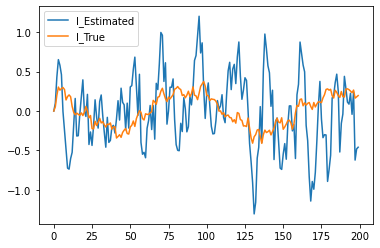

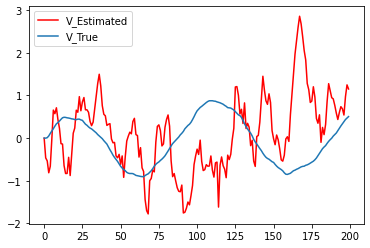

In [184]:
plt.plot(time, x_estimate4[0,:].T)
plt.plot(time, x[0,:].T)
plt.legend(['I_Estimated', 'I_True'])

plt.figure()
plt.plot(time, x_estimate4[1,:].T,'r') 
plt.plot(time, x[1,:].T)
plt.legend(['V_Estimated', 'V_True'])

Compute the Average Squared Error (ASE)

In [185]:
# sigma = 0.001
ASE1 = np.zeros((2,1))
ASE2 = np.zeros((2,1))
ASE3 = np.zeros((2,1))
ASE4 = np.zeros((2,1))
for k in range(200):
    ASE1 = ASE1 + np.multiply(x[:,k]-x_estimate1[:,k],x[:,k]-x_estimate1[:,k])
ASE1 = ASE1 / 200
# sigma = 0.01
for k in range(200):
    ASE2 = ASE2 + np.multiply(x[:,k]-x_estimate2[:,k],x[:,k]-x_estimate2[:,k])
ASE2 = ASE2 / 200
# sigma = 0.02
for k in range(200):
    ASE3 = ASE3 + np.multiply(x[:,k]-x_estimate3[:,k],x[:,k]-x_estimate3[:,k])
ASE3 = ASE3 / 200
# sigma = 0.1
for k in range(200):
    ASE4 = ASE4 + np.multiply(x[:,k]-x_estimate4[:,k],x[:,k]-x_estimate4[:,k])
ASE4 = ASE4 / 200

print(ASE1.T)
print(ASE2.T)
print(ASE3.T)
print(ASE4.T)

[[0.03843919 0.28900024]]
[[0.0603918  0.16802661]]
[[0.0604398  0.24998905]]
[[0.22185603 1.26152354]]
